In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import data_handling as dh
from data_gen import Datagen



types = {"tdlgm": "../tdlgm/results"}




def get_file(filename="entries"):
    l = None
    with open(filename, "r") as f:
        l = json.loads(f.read())
    return l

def draw_other(y,y_t, title, name=""):
    fig, ax = plt.subplots(2, layout="constrained")
    
    ax[0].plot( range(1,101) , y_t[:100])
    ax[0].plot( range(1,101) , y[:100])
    
    ax[1].plot( range(400,500) , y_t[400:])
    ax[1].plot(range(400,500), y[400:])
    
    for a in ax:
        a.set_xlabel("Timestep")
        a.set_ylabel("Fraction of GPU")
    
    fig.suptitle(title)
    if name != "":
        fig.savefig(name)
        plt.close("all")


/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]
/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]


/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]
/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]
/tmp/ipykernel_711756/2003839752.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig

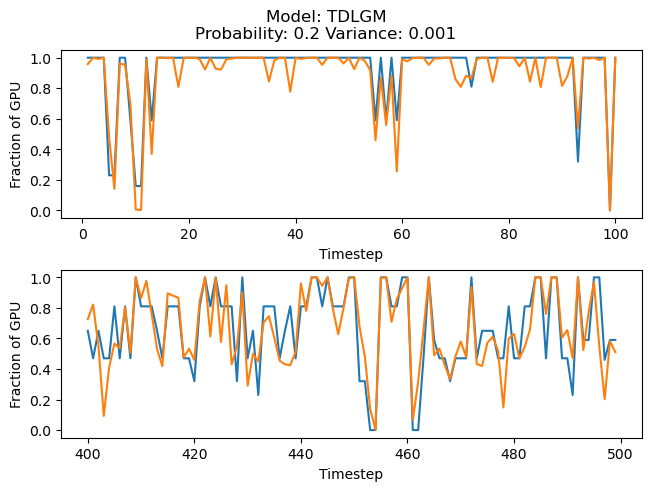

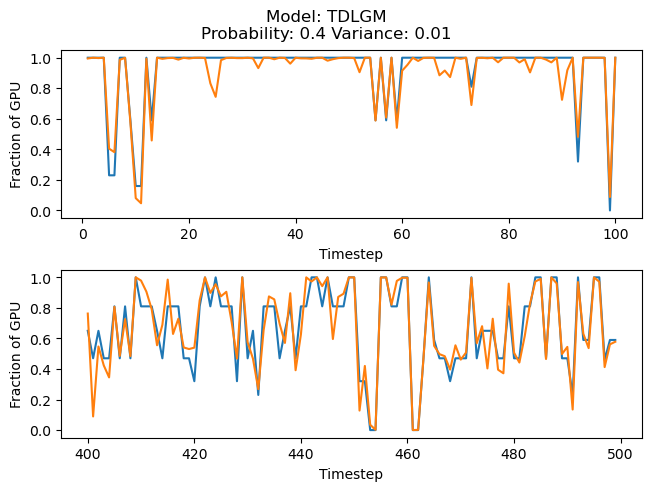

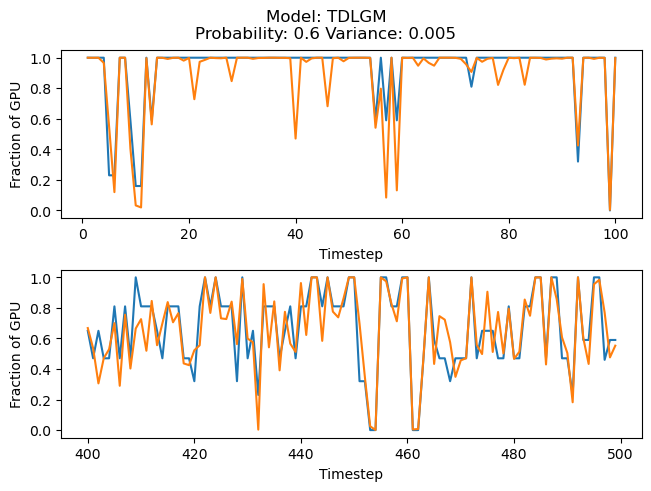

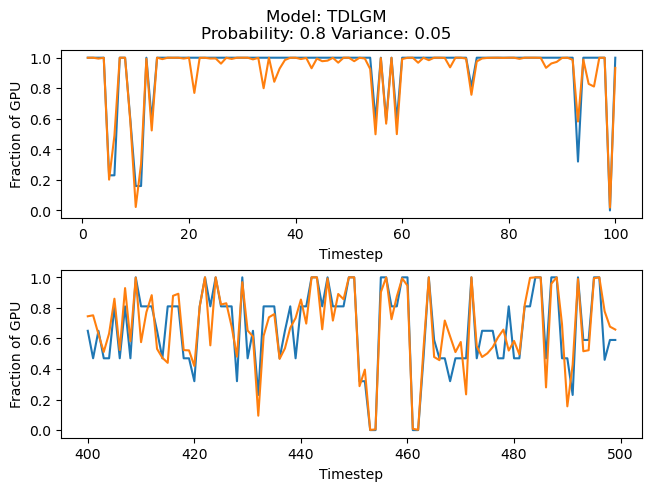

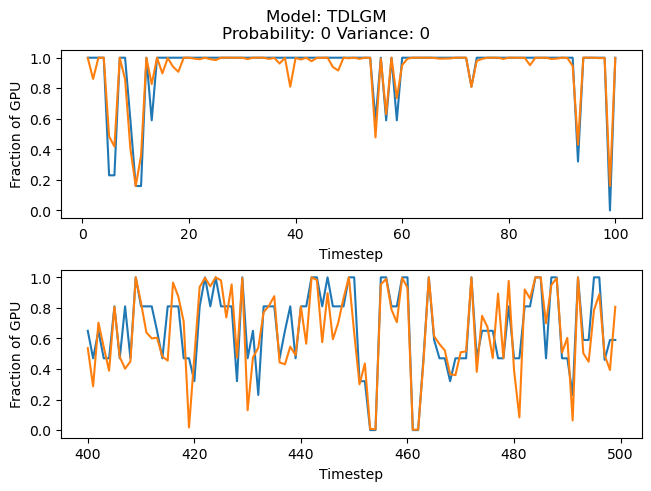

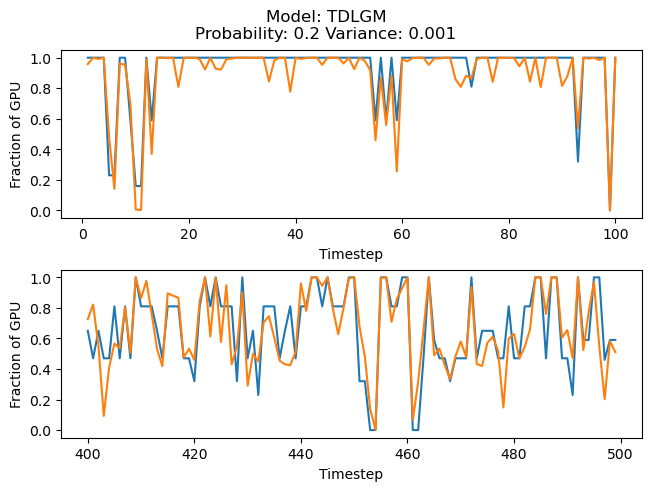

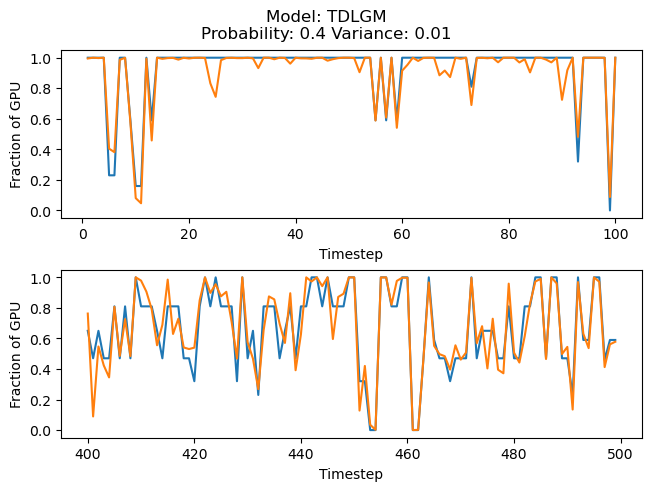

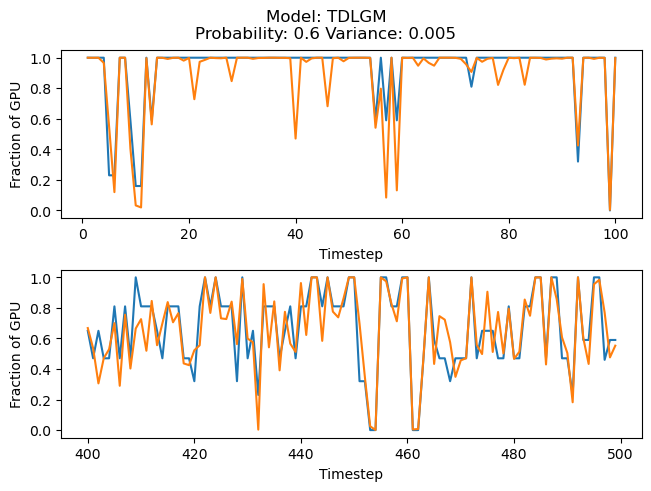

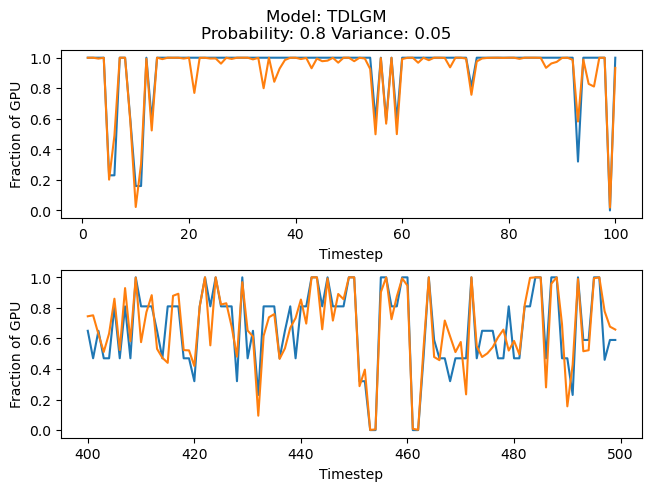

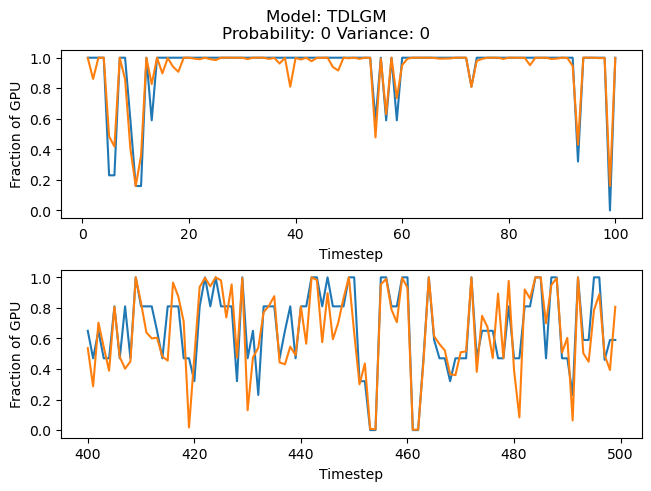

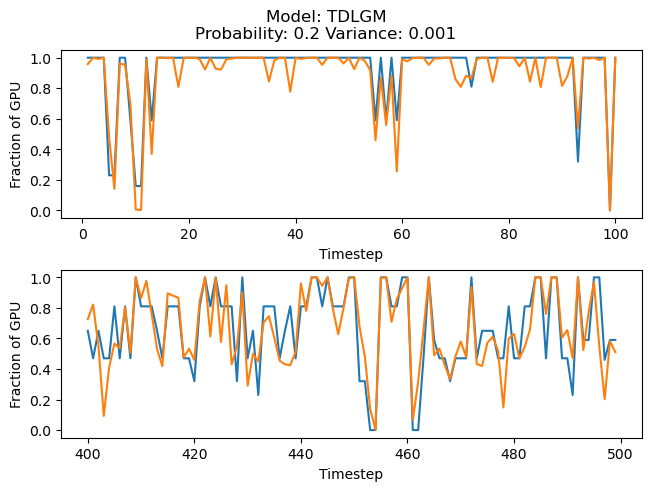

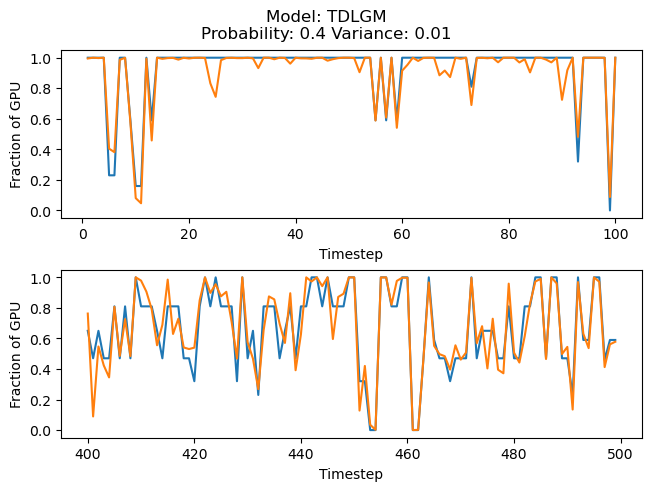

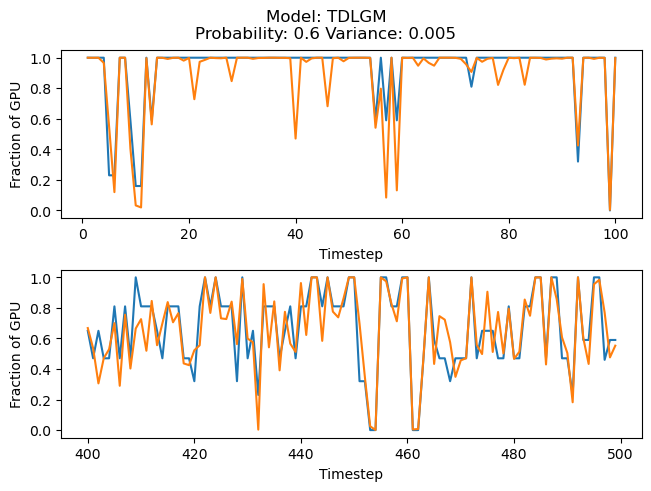

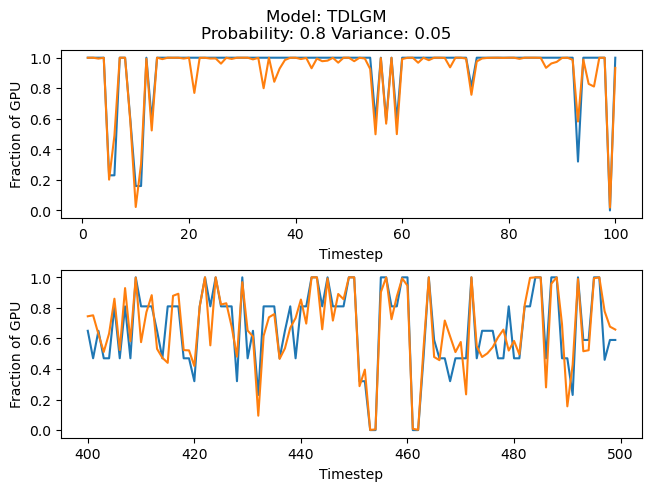

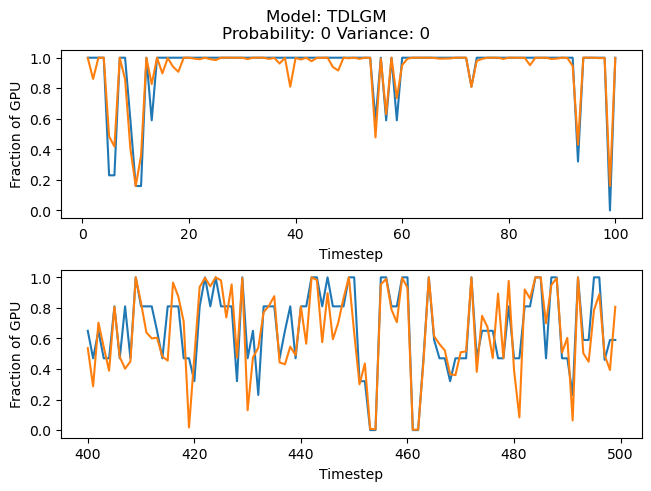

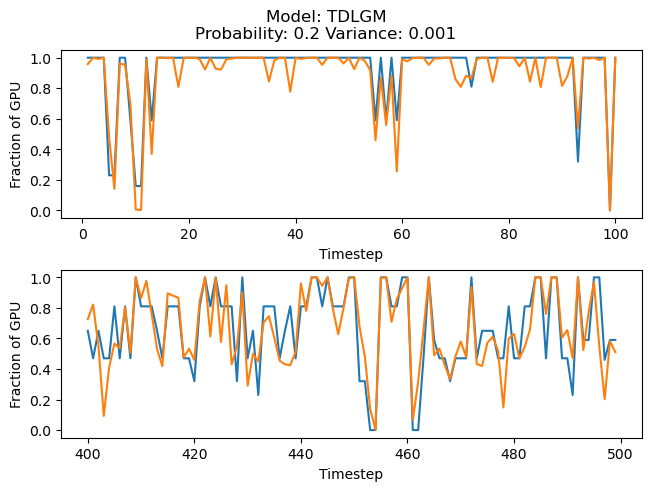

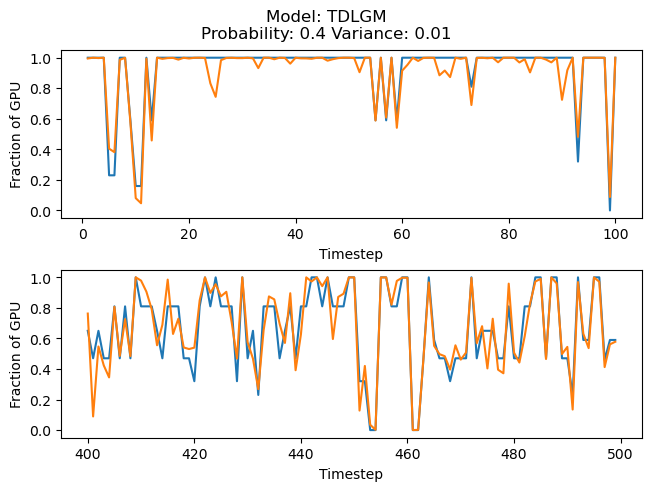

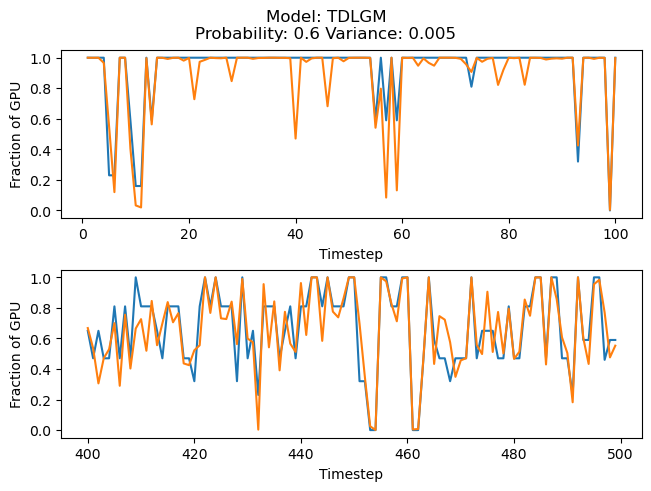

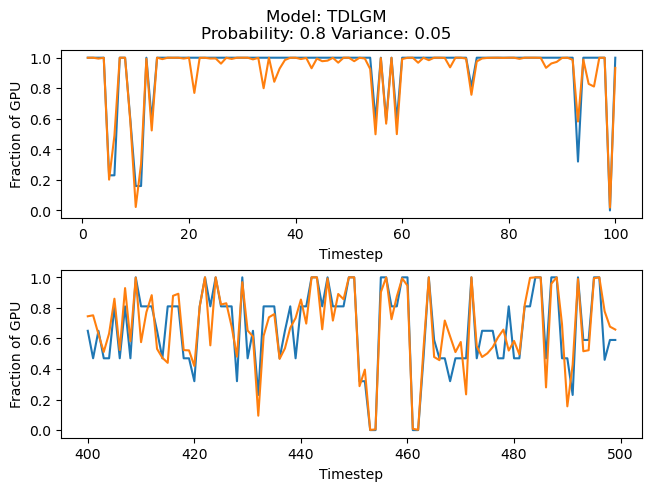

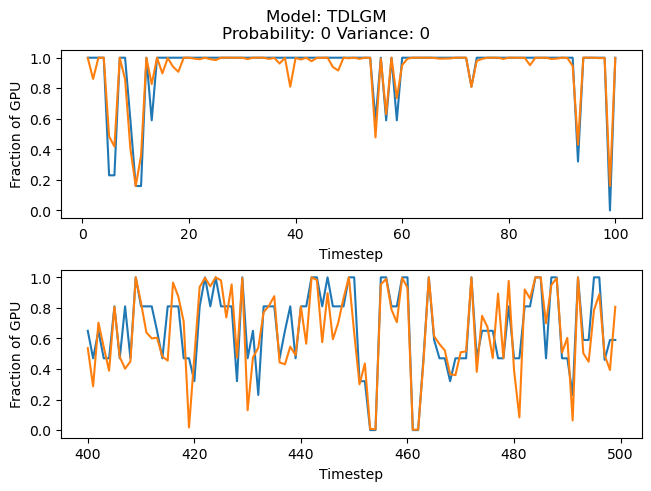

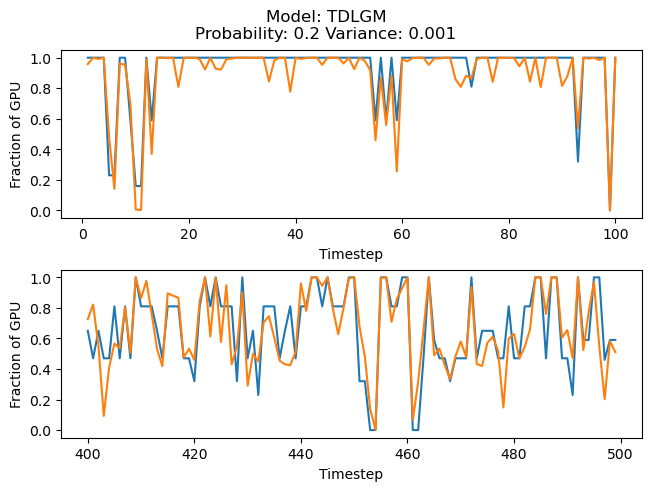

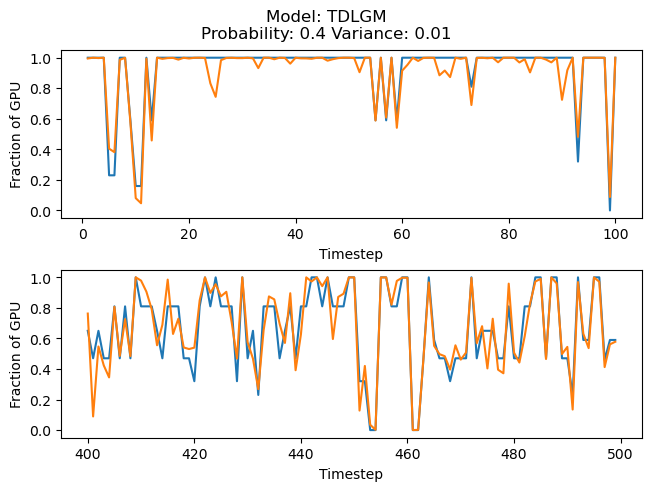

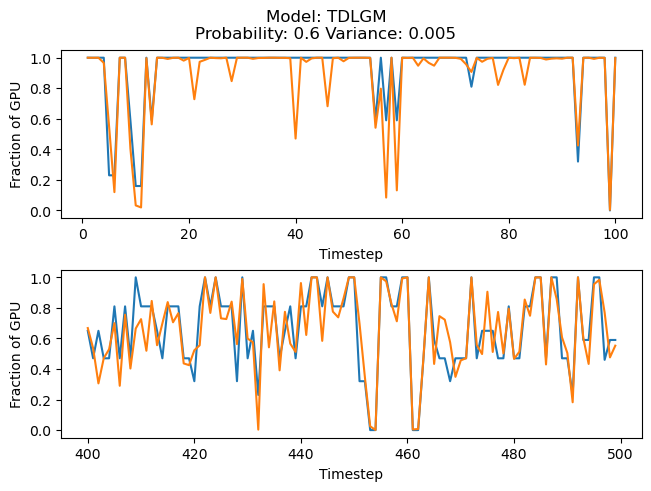

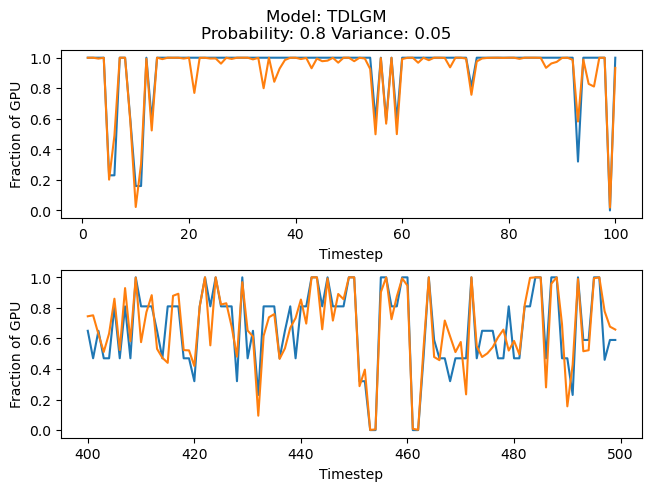

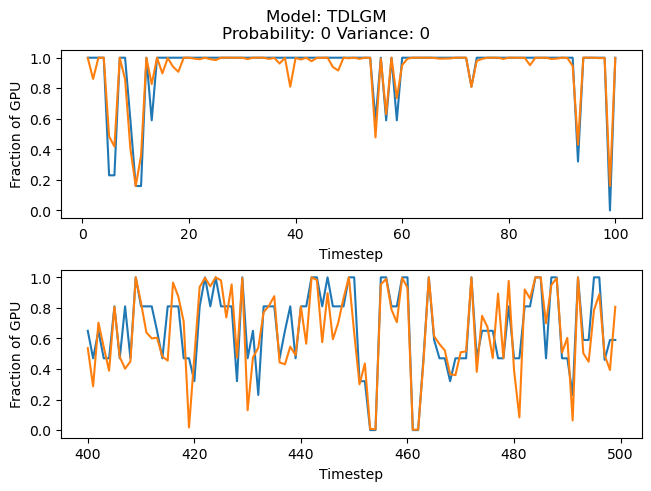

In [2]:
gen = Datagen(None)

_, y_val, _ = gen.get_test_data(1)

f = get_file("reconstruction_scores_rnn.json")

for i in f:
    name = ""
    for k in types:
        comp = "/" + k
        if comp in i["name"]:
            name = k
    o = dh.get_file(i["name"])[0]
    for t in o["test_run"]:
        
        title = ("Model: " + name.upper() + "\nProbability: " +
            (str(t["probability"]) if t["probability"] != 1 else "0") + 
            " Variance: " + str(t["variance"]))
        draw_other(t["results"][0], y_val, title)
    
    


In [3]:
gen = Datagen(None)

_, y_val, _ = gen.get_test_data(1)

f = get_file("recon.json")

for i in dh.get_all_files(types["rnn"]):
    name = ""
    o = dh.get_file(types["rnn"] + "/" + i)[0]
    t = o["test_run"][0]
        
    title = i
    draw_other(t["results"][0], y_val,"Model: RNN\nProbability: 0 Variance: 0", "img/" + i + ".png")
    
    

/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]
/home/carladm/Documents/tDLGM/experiments/data_parsing/data_gen.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = df.max()[0]


FileNotFoundError: [Errno 2] No such file or directory: 'recon.json'

In [ ]:
dh.plot_file('../tdlgm/results/seq_len12,layers1,latent4,hidden128,l0.1,variance0.01,data_prob0.6,regularization0entries.json')
f = dh.get_file('../tdlgm/results/seq_len12,layers1,latent4,hidden128,l0.1,variance0.01,data_prob0.6,regularization0entries.json')[0]

dh.bin_plot(f["y_hat"][0],0,1,0.05)